# Classifying newswires

In [1]:
from tensorflow.keras.datasets import reuters

In [16]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

550378/550378 [==============================] - 0s 0us/step


In [8]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [9]:
train_labels[10]

3

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [19]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [22]:
from tensorflow import keras
from keras import layers

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')    
])

In [24]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [32]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 51ms/step - loss: 2.5920 - accuracy: 0.5316 - val_loss: 1.7054 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4069 - accuracy: 0.7068 - val_loss: 1.3089 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0604 - accuracy: 0.7725 - val_loss: 1.1536 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8344 - accuracy: 0.8161 - val_loss: 1.0550 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6629 - accuracy: 0.8557 - val_loss: 0.9909 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5215 - accuracy: 0.8904 - val_loss: 0.9308 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4156 - accuracy: 0.9116 - val_loss: 0.9085 - val_accuracy: 0.8180
Epoch 8/20
16

In [34]:
import matplotlib.pyplot as plt

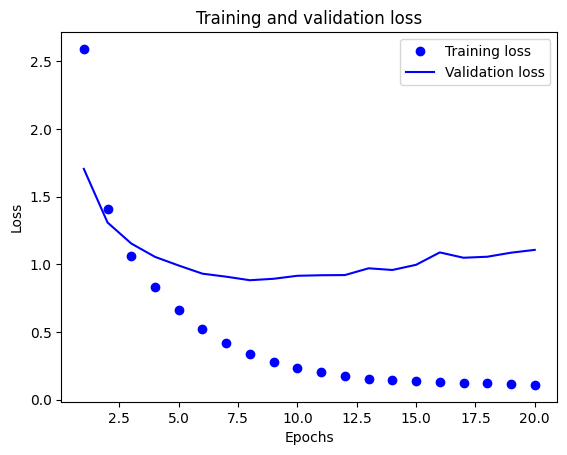

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

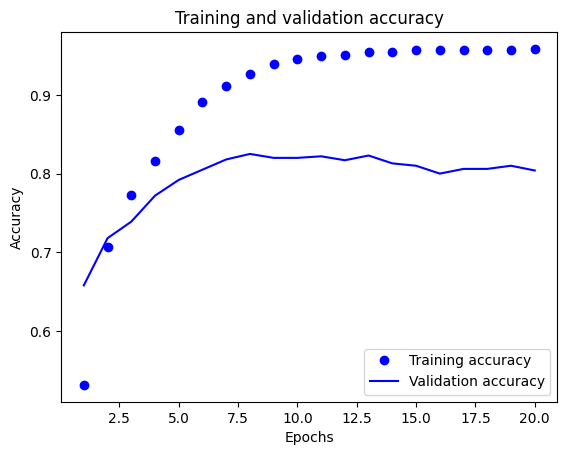

In [37]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation = 'softmax')
])

In [39]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
model.fit(x_train,
         y_train,
         epochs=9,
         batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 19ms/step - loss: 2.4681 - accuracy: 0.4827
Epoch 2/9
18/18 [==============================] - 0s 23ms/step - loss: 1.3118 - accuracy: 0.7203
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9665 - accuracy: 0.7915
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7505 - accuracy: 0.8403
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5968 - accuracy: 0.8750
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4713 - accuracy: 0.8999
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3808 - accuracy: 0.9193
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3107 - accuracy: 0.9294
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 0.2619 - accuracy: 0.9388


In [41]:
results=model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 7ms/step - loss: 0.9438 - accuracy: 0.7907


In [42]:
results # test loss, test accuracy

[0.9437650442123413, 0.790739119052887]

In [43]:
import copy

In [44]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18477292965271594

In [45]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])

1.0000001

In [48]:
np.argmax(predictions[0])

3

In [49]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [50]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [52]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [53]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.1078 - accuracy: 0.1039 - val_loss: 2.4214 - val_accuracy: 0.4810
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.9355 - accuracy: 0.5405 - val_loss: 1.6887 - val_accuracy: 0.5610
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4766 - accuracy: 0.6059 - val_loss: 1.5018 - val_accuracy: 0.6220
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2633 - accuracy: 0.6671 - val_loss: 1.4207 - val_accuracy: 0.6360
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1147 - accuracy: 0.7016 - val_loss: 1.3594 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9903 - accuracy: 0.7478 - val_loss: 1.3226 - val_accuracy: 0.7100
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8909 - accuracy: 0.7756 - val_loss: 1.3544 - val_accuracy: 0.7110
Epoch 8/20
63/63 [